In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as ss
import seaborn as sns

import tensorflow as tf
import keras
from keras import backend as K
from keras import Sequential
from keras.layers import Conv1D, MaxPool1D, Dense, Input, Flatten, Concatenate, Reshape, Lambda

Using TensorFlow backend.


Normal

In [2]:
n_mus = 100
n_sds = 100
min_x, max_x = -10, 10
min_mu, max_mu = -2, 2
min_sd, max_sd = .1, 3

n_data = 1000

In [3]:
mu, sd = np.meshgrid(np.linspace(min_mu, max_mu, n_mus), np.linspace(min_sd, max_sd, n_sds))
mu, sd = mu.ravel(), sd.ravel()

In [4]:
x = np.linspace(min_x, max_x, n_data)

In [5]:
# mu/sd are 1d and we sample 1000 entries per combination of mean/sd.
data = ss.norm(mu[:, np.newaxis], sd[:, np.newaxis]).pdf(x[np.newaxis, :])
data.shape

(10000, 1000)

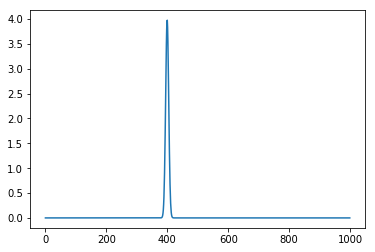

In [6]:
input_data = np.array((mu, sd)).T

plt.plot(data[0, :]) # Samples for mu = -1, sd = .1.

In [7]:
model = keras.Sequential()

model.add(Conv1D(50, 50, activation='relu', input_shape=(1000, 1)))
print(model.output_shape)

model.add(MaxPool1D(10))
print(model.output_shape)

model.add(Flatten())
print(model.output_shape)

model.add(Dense(2))
print(model.output_shape)

model.compile(optimizer='adam',
              loss='mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.
(None, 951, 50)
(None, 95, 50)
(None, 4750)
(None, 2)


In [8]:
model.fit(data[:, :, np.newaxis], input_data)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
10000/10000 [==============================] - 2s 171us/step - loss: 0.1138


In [9]:
predictions = model.predict(data[..., np.newaxis])

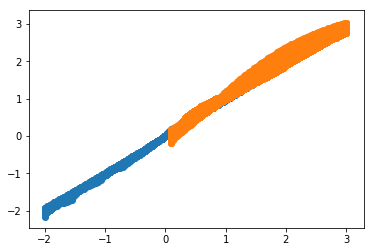

In [10]:
plt.scatter(input_data[:, 0], predictions[:, 0])
plt.scatter(input_data[:, 1], predictions[:, 1])

Log-Normal

In [11]:
n_mus = 100
n_sds = 100
min_x, max_x = 0, 10
min_mu, max_mu = .1, 5
min_sd, max_sd = .1, 3

n_data = 5000

In [12]:
mu, sd = np.meshgrid(np.linspace(min_mu, max_mu, n_mus), np.linspace(min_sd, max_sd, n_sds))
mu, sd = mu.ravel(), sd.ravel()

In [13]:
x = np.linspace(min_x, max_x, n_data)

In [14]:
# mu/sd are 1d and we sample 1000 entries per combination of mean/sd.
data = ss.lognorm(mu[:, np.newaxis], sd[:, np.newaxis]).pdf(x[np.newaxis, :])
data.shape

(10000, 5000)

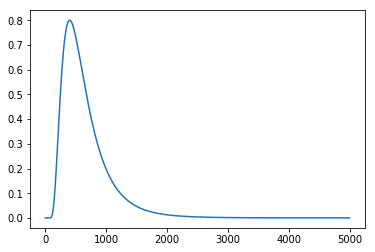

In [15]:
input_data = np.array((mu, sd)).T

plt.plot(data[10, :]) # Samples for mu = ~0.6, sd = .1.

In [16]:
model = keras.Sequential()

model.add(Conv1D(50, 50, activation='relu', input_shape=(5000, 1)))
print(model.output_shape)

model.add(MaxPool1D(10))
print(model.output_shape)

model.add(Flatten())
print(model.output_shape)

model.add(Dense(2, activation='relu'))
print(model.output_shape)

model.compile(optimizer='adam',
              loss='mean_squared_error')

(None, 4951, 50)
(None, 495, 50)
(None, 24750)
(None, 2)


In [17]:
model.fit(data[:, :, np.newaxis], input_data)

Epoch 1/1
10000/10000 [==============================] - 10s 1ms/step - loss: 0.6380


In [18]:
predictions = model.predict(data[..., np.newaxis])

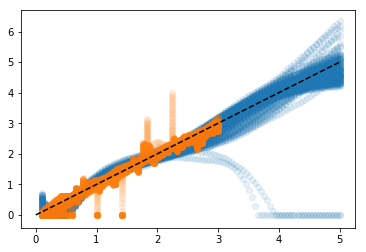

In [19]:
plt.scatter(input_data[:, 0], predictions[:, 0], alpha=.1)
plt.scatter(input_data[:, 1], predictions[:, 1], alpha=.1)
plt.plot([0, 5], [0, 5], c='k', ls='--')

In [20]:
n_mus = 100
n_sds = 100
min_x, max_x = 0, 10
min_mu, max_mu = .1, 5
min_sd, max_sd = .1, 3

n_data = 1000

In [21]:
mu, sd = np.meshgrid(np.linspace(min_mu, max_mu, n_mus), np.linspace(min_sd, max_sd, n_sds))
mu, sd = mu.ravel(), sd.ravel()

In [22]:
x = np.linspace(min_x, max_x, n_data)

In [23]:
# mu/sd are 1d and we sample 1000 entries per combination of mean/sd.
data = ss.lognorm(mu[:, np.newaxis], sd[:, np.newaxis]).pdf(x[np.newaxis, :])
data.shape

(10000, 1000)

In [24]:
input_data = np.array((mu, sd)).T

Mu: 0.1 
Sd: 0.9787878787878787


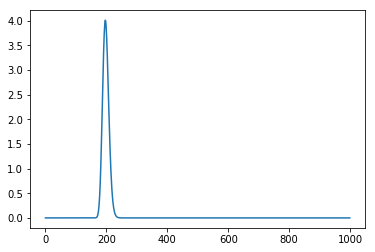

In [25]:
plt.plot(data[3000, :])
print('Mu:', mu[3000], '\nSd:', sd[3000])

In [30]:
model = keras.Sequential()

model.add(Dense(10, activation='relu', input_shape=(2, 1)))
print(model.output_shape)

model.add(Flatten())
print(model.output_shape)

model.add(Dense(100, activation='relu'))
print(model.output_shape)

model.add(Conv1D(1000, 2, activation='relu', input_shape=(5000, 1)))
print(model.output_shape)

model.compile(optimizer='adam',
              loss='mean_squared_error')

(None, 2, 10)
(None, 20)
(None, 100)


ValueError: Input 0 is incompatible with layer conv1d_5: expected ndim=3, found ndim=2

In [ ]:
model.fit(input_data[:, :, np.newaxis], data)

In [ ]:
predictions = model.predict(input_data[..., np.newaxis])

In [ ]:
predictions.shape

In [ ]:
plt.plot(np.arange(0, predictions.shape[1]), predictions[3000, :])

In [31]:
n_mus = 100
min_x, max_x = -10, 10
min_mu, max_mu = -3, 3

n_data = 10000
n_samples = 100

In [32]:
mu = np.linspace(min_mu, max_mu, n_data)
x = np.linspace(min_x, max_x, n_samples)

In [33]:
# mu/sd are 1d and we sample 1000 entries per combination of mean/sd.
data = ss.norm(mu[:, np.newaxis]).logpdf(x[np.newaxis, :])
data.shape

(10000, 100)

In [34]:
input_data = mu[:, np.newaxis]

Mu: -1.1998199819981996


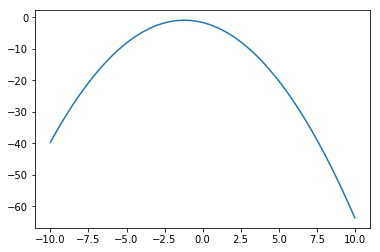

In [35]:
plt.plot(x, data[3000, :])
print('Mu:', mu[3000])

In [36]:
from keras.utils import plot_model
from IPython.display import Image

In [37]:
mu_model = Input(shape=(1,))

layer_1 = []
layer_2 = []

for i in range(1, 31):
    layer_1.append(Dense(1, activation='relu', name='layer_1_{:02d}'.format(i))(mu_model))
    layer_2.append(Dense(4, activation='relu', name='layer_2_{:02d}'.format(i))(layer_1[-1]))
        
concat = Concatenate()(layer_2)
print(concat.shape)

reshape = Reshape(target_shape=(120,1))(concat)

conv = Conv1D(filters=15, kernel_size=21, strides=1)(reshape)
print(conv.shape)

avg = Lambda(lambda x: K.sum(x, axis=2), output_shape=lambda s: (s[0], s[1]))(conv)
print(avg.shape)

model = keras.Model(mu_model, avg)
    
plot_model(model, to_file='model.png')

(?, 120)
(?, 100, 15)
(?, 100)


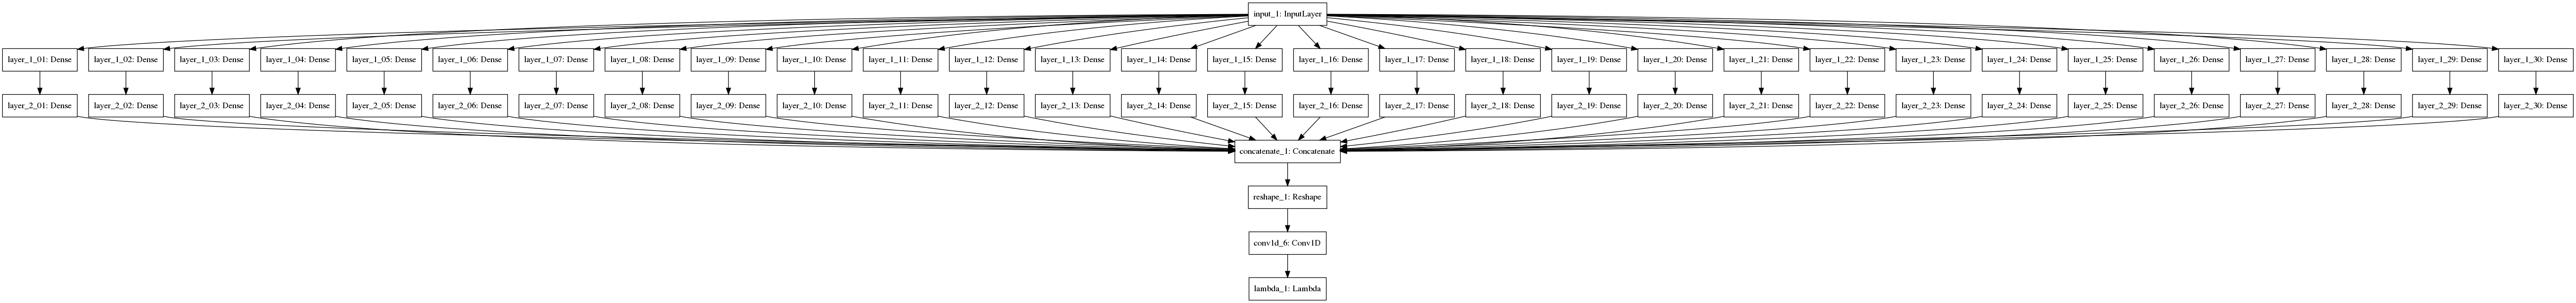

In [38]:
Image(retina=True, filename='model.png')

In [39]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [40]:
model.fit(input_data, data, shuffle=True, batch_size=32, epochs=25)

Epoch 1/25
10000/10000 [==============================] - 2s 201us/step - loss: 288.5441
Epoch 2/25
10000/10000 [==============================] - 1s 71us/step - loss: 56.7483
Epoch 3/25
10000/10000 [==============================] - 1s 72us/step - loss: 25.4215
Epoch 4/25
10000/10000 [==============================] - 1s 71us/step - loss: 14.4157
Epoch 5/25
10000/10000 [==============================] - 1s 72us/step - loss: 9.5031
Epoch 6/25
10000/10000 [==============================] - 1s 71us/step - loss: 6.9547
Epoch 7/25
10000/10000 [==============================] - 1s 71us/step - loss: 5.4618
Epoch 8/25
10000/10000 [==============================] - 1s 71us/step - loss: 4.5719
Epoch 9/25
10000/10000 [==============================] - 1s 70us/step - loss: 3.9757
Epoch 10/25
10000/10000 [==============================] - 1s 71us/step - loss: 3.4865
Epoch 11/25
10000/10000 [==============================] - 1s 70us/step - loss: 3.0505
Epoch 12/25
10000/10000 [=====================

In [41]:
predictions = model.predict(input_data)

In [42]:
predictions.shape

(10000, 100)

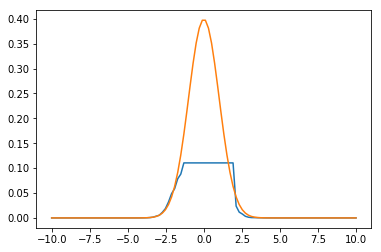

In [43]:
ix = 5000
plt.plot(x, np.exp(predictions[ix, :]))
plt.plot(x, np.exp(data[ix, :]))

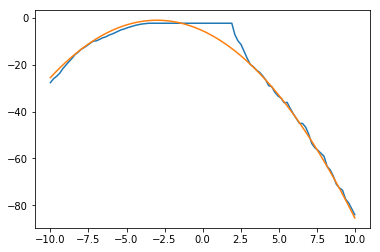

In [44]:
plt.plot(x, predictions[3, :])
plt.plot(x, data[3, :])

In [45]:
np.log(.35)

-1.0498221244986778